In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns
import numpy.ma as ma

In [2]:
result = np.zeros((2160))
i=0

In [3]:
# 224:343 --------- 64S-69S
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(150,330)]
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.SSS.nc')
        plotvar = data.variables['SALT'][0,:,:]
        plotvar = plotvar[0,603:808,600:1100]
        aveplot = plotvar.mean(axis=0)
        aveplot = aveplot.mean(axis=0)
        result[i] = aveplot
        
        i = i + 1

In [4]:
resultee = np.zeros((84))
i=0

In [5]:
# 330-336 --------- 64S-69S
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(330,337)]
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/scratch/user/xiliangdiao/figures/SALT_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.nc')
        plotvar = data.variables['SALT'][0,:,:]
        plotvar = plotvar[0,603:808,600:1100]
        aveplot = plotvar.mean(axis=0)
        aveplot = aveplot.mean(axis=0)
        resultee[i] = aveplot
        
        i = i + 1

In [6]:
result.shape

(2160,)

In [7]:
ww2 = np.convolve(result, np.ones((60,))/60, mode='valid')

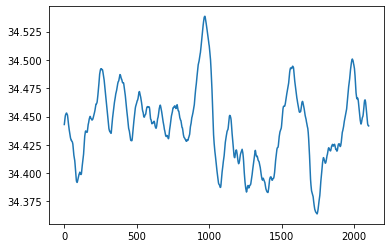

In [8]:
plt.plot(ww2)

In [9]:
np.savetxt('SSS150-330.out',result)

In [10]:
result2 = np.zeros((1944))
i=0

In [11]:
12*162

1944

In [12]:
# 224:343 --------- 64S-69S
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(338,500)]
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn330-500/cmpr_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.SSS2.nc')
        plotvar = data.variables['SALT'][0,:,:]
        plotvar = plotvar[0,603:808,600:1100]
        aveplot = plotvar.mean(axis=0)
        aveplot = aveplot.mean(axis=0)
        result2[i] = aveplot
        
        i = i + 1

In [13]:
ww = np.convolve(result2, np.ones((60,))/60, mode='valid')

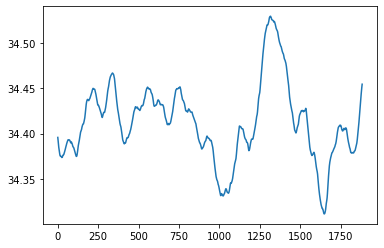

In [14]:
plt.plot(ww)

In [15]:
np.savetxt('SSS338-500.out',result2)

In [16]:
two = result2[0:12]

In [17]:
d1 = np.hstack((result,resultee))
d2 = np.hstack((d1,two))
d3 = np.hstack((d2,result2))



In [18]:
ww = np.convolve(d3, np.ones((60,))/60, mode='valid')

In [19]:
nn = np.nanmean(ww)

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


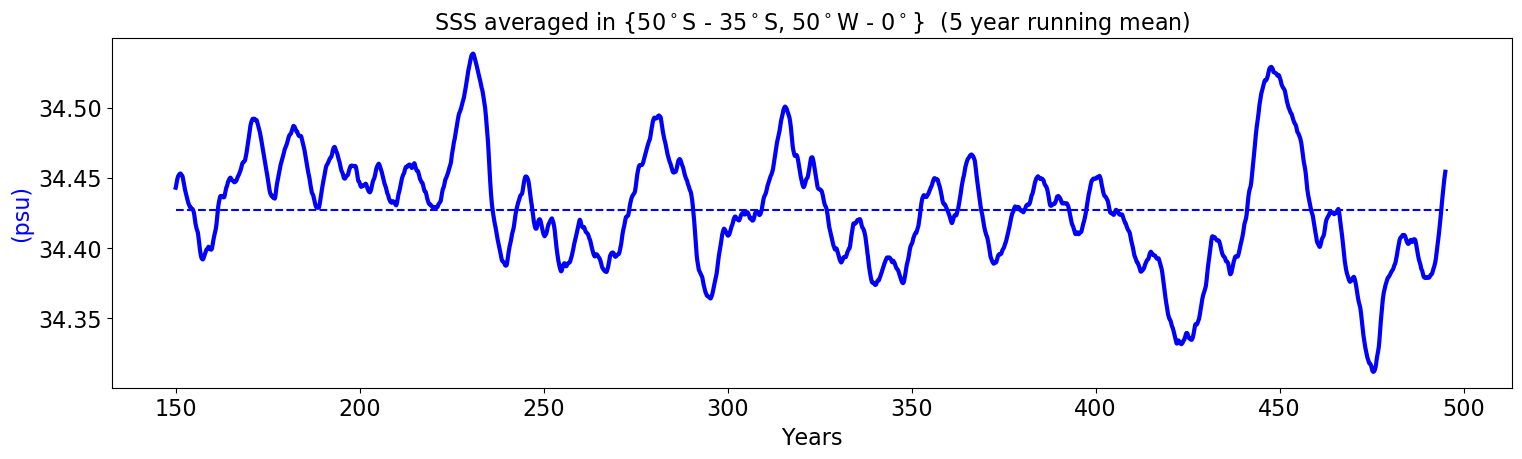

In [20]:
t = np.arange(0,4176,12)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(ww,'b',linewidth=3)
plt.hlines(nn, 0, 4150, colors = "b",linestyles = "dashed")
#ax0.plot(tem,'red',linewidth=3)
#########################################

plt.xticks(range(0,4201,600), ['150','200','250','300', '350', '400','450','500'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('(psu)',color= 'b',**my_font)
plt.axis("tight")
#ax0.set(ylim=(55, 92),xlim=(0, 4170))
ax0.set_title('SSS averaged in {50$^\circ$S - 35$^\circ$S, 50$^\circ$W - 0$^\circ$}  (5 year running mean)',**my_font)
plt.savefig("SOM-SSS.png",bbox_inches='tight',dpi=fig.dpi)

In [21]:
np.savetxt('SSS-upup.out',ww)

In [22]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

wspxx = wspxx*12
mrpxx = mrpxx*12
noxx = noxx*12

list_before = wspxx
list_after = [val for val in list_before for i in range(12)]
xxx = np.reshape(list_after,(123,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

list_before = mrpxx
list_after = [val for val in list_before for i in range(12)]
mrpxxx = np.reshape(list_after,(233,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

list_before = noxx
list_after = [val for val in list_before for i in range(12)]
noxxx = np.reshape(list_after,(117,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

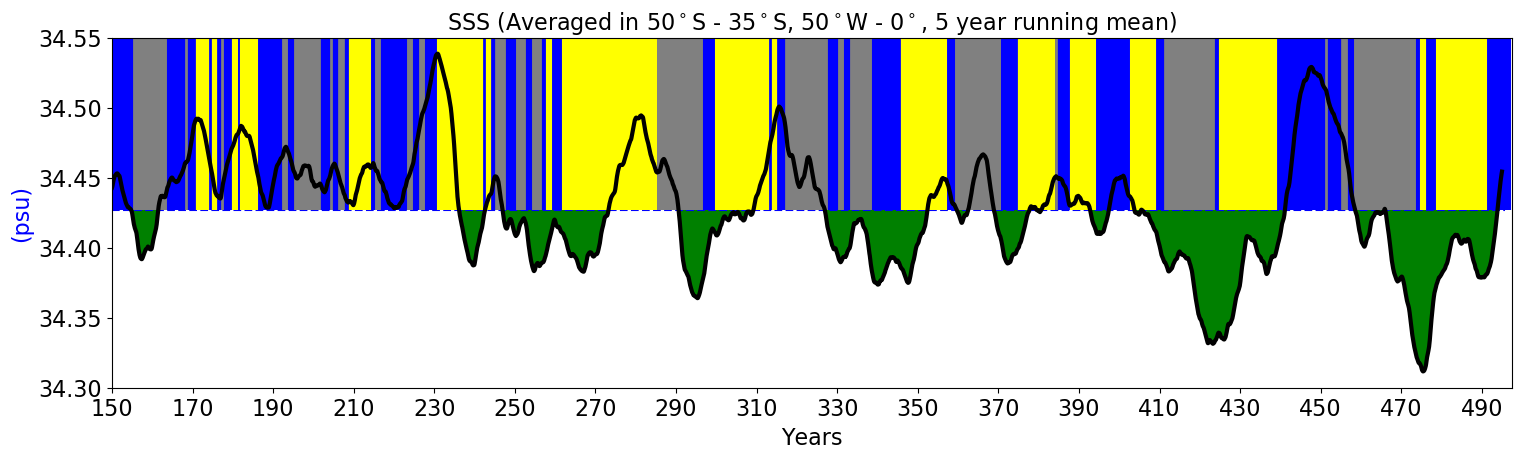

In [29]:
t = np.arange(0,4141,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(ww,'black',linewidth=3)
plt.hlines(nn, 0, 4150, colors = "b",linestyles = "dashed")
ax0.fill_between(t,nn,ww,where=ww < nn,facecolor='green', alpha=1)
#ax0.plot(tem,'red',linewidth=3)
#########################################

plt.xticks(range(0,4227,240), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
plt.yticks(**my_font)

plt.vlines(noxxx, nn, 34.55, colors = "grey")
plt.vlines(mrpxxx, nn, 34.55, colors = "blue")
plt.vlines(xxx, nn, 34.55, colors = "yellow")
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('(psu)',color= 'b',**my_font)
plt.axis("tight")
ax0.set(ylim=(34.30, 34.55),xlim=(0, 4170))
ax0.set_title('SSS (Averaged in 50$^\circ$S - 35$^\circ$S, 50$^\circ$W - 0$^\circ$, 5 year running mean)',**my_font)
plt.savefig("SOM-SSS.png",bbox_inches='tight',dpi=fig.dpi)